# Regression Lineaire
Dans ce notebook, on va générer un nuage de point ressemblant à une droite, on va ensuite tenter d'approcher cette droite avec une régression linéaire basée sur l'erreur quadratique moyenne...<br>
Posons la droite $y_p$ parfaite : <br>
$y_p(x) = 3.x+20$

In [5]:
# Posons cette doite.
y_p = lambda x:3*x+20

On va tracer ces points sous forme de scatter plots, mais on va également ajouter un léger bruit aux valeurs calculées.<br>
On définit donc $y_n$ comme noisy :<br>
$y_{n}(x) = a.x+b+z$ avec  $z \sim \mathcal{N}(0,\sigma)$

Prenons $\sigma=3$

In [6]:
import numpy as np
import random
sigma = 1

x = np.linspace(-20,20,100)
y = y_p(x) + np.random.normal(0,sigma,x.shape)

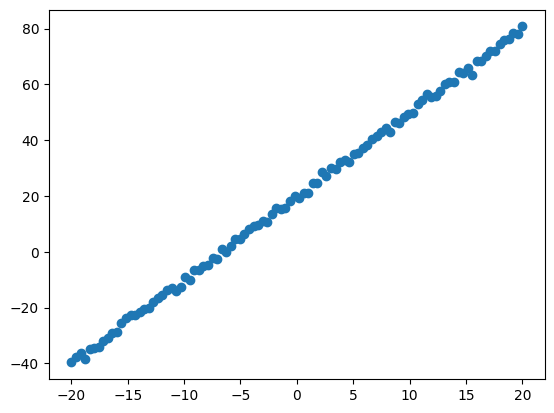

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

On va essayer de modéliser nos points avec la droite $y(x) = a.x + b$. <br>
On va initialiser les paramètres avec $a=1$ et $b=0$

In [8]:
a = 1
b = 0

On peut afficher la droite sur notre graphique précédent... On va également tracer l'erreur entre le 10ème point de la liste des x et l'approximation du modèle...

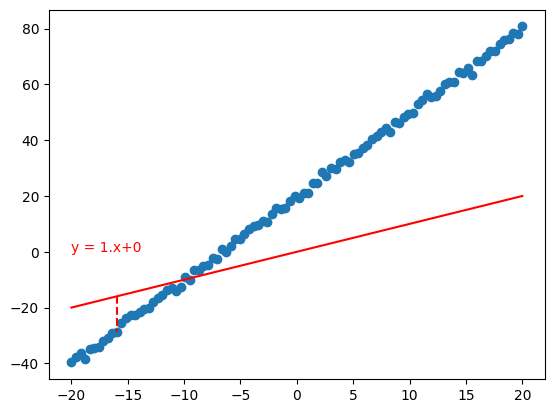

In [9]:
import matplotlib.pyplot as plt
def draw_droite(x,y,a,b):
    fig,ax =plt.subplots(1,1)
    ax.scatter(x,y)
    ax.plot(x,a*x+b,color='r')
    # We plot a line, showing the error...
    ax.plot([x[10],x[10]],[a*x[10]+b,y[10]],color='r',linestyle='dashed')
    ax.text(-20,0,f'y = {round(a,2)}.x+{round(b,2)}',color='r')
    return fig

fig = draw_droite(x,y,a,b)
fig.show()

On peut définir l'erreur comme ceci :<br>
$E_{totale} = \sum (y_i - (a.x_i+b))^2$ avec $a$ et $b$ les coefficients de notre modèle.<br>

On peut également définir la dérivée de cette erreur par rapport à nos **paramètres** ($a$ et **$b$**).<br>
$\frac{dE_{totale}}{da} = - \sum x_i.(y_i - (a.x_i+b))$<br>
$\frac{dE_{totale}}{db} = - \sum (y_i - (a.x_i+b))$<br>

Grace à cette méthode, on peut mettre à jour nos coefficients $a$ et $b$ de manière itérative : <br>
$a_{n+1} = a_n - \nu.\nabla_aE_{totale}$<br>
$b_{n+1} = b_n - \nu.\nabla_bE_{totale}$

Implementons ce comportement...

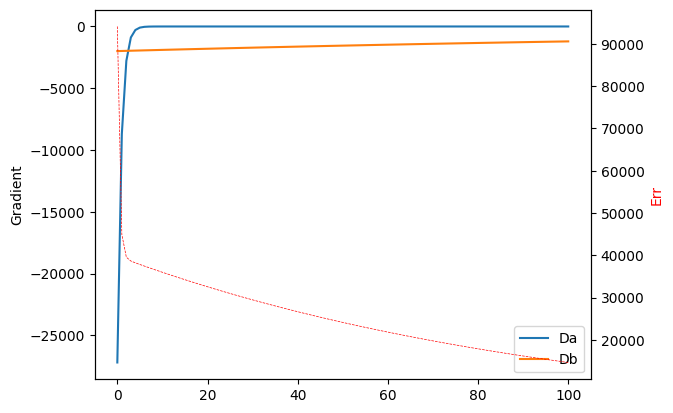

In [11]:
from matplotlib.animation import FuncAnimation
from IPython import display
from tempfile import TemporaryFile
import time

class LinearRegression:
    DErr_da_fn = lambda x,y,a,b:np.sum(-x*(y-(a*x+b)))
    DErr_db_fn = lambda x,y,a,b:np.sum(-(y-(a*x+b)))
    Err_fn = lambda x,y,a,b:np.sum((y-(a*x+b))**2)
    def __init__(self,a,b):
        self.a = a
        self.b = b
        self.x = None
        self.y = None
        self.Da = None
        self.Db = None
        self.lr = None
        self.beta = None
        self.video = None

    def fit(self,x,y,lr=1e-4,iterations=100):
        self.x = x
        self.y = y
        self.lr = lr
        self.d_a = 0
        self.d_b = 0
        self.Da = []
        self.Db = []
        self.Err = []
        # We create the figure and fit the model...
        fig,ax = self.plot_points()
        anim = FuncAnimation(fig,self._update,frames=iterations,interval=200)
        self.video = anim.to_html5_video()
        self.fig_final = fig
        plt.close()

    def plot_video(self):
        assert self.video is not None,'Run fit before'
        html = display.HTML(self.video)
        display.display(html)
    
    def plot_gradients(self):
        assert self.Da is not None and self.Db is not None,'Run fit before'
        fig,ax = plt.subplots()
        ax2 = ax.twinx()
        ax.plot(self.Da,label='Da')
        ax.plot(self.Db,label='Db')
        ax.set_ylabel('Gradient')
        ax2.plot(self.Err,label='Err',color='r',linewidth=0.5,linestyle='dashed')
        ax2.set_ylabel('Err', color='r')
        ax.legend()

    def plot_points(self):
        fig,ax =plt.subplots(1,1)
        ax.scatter(self.x,self.y)
        self.line,=ax.plot(self.x,self.a*self.x+self.b,color='r')
        # We plot a line, showing the error...
        self.err,=ax.plot([self.x[10],self.x[10]],[self.a*self.x[10]+self.b,self.y[10]],color='r',linestyle='dashed')
        self.txt =ax.text(-20,0,f'y = {round(self.a,2)}.x+{round(self.b,2)}',color='r')
        return fig,ax
    
    def _update(self,frame):
        d_a = LinearRegression.DErr_da_fn(self.x,self.y,self.a,self.b)
        d_b = LinearRegression.DErr_db_fn(self.x,self.y,self.a,self.b)
        Err = LinearRegression.Err_fn(self.x,self.y,self.a,self.b)
        self.Da.append(d_a)
        self.Db.append(d_b)
        self.Err.append(Err)
        self.a = self.a-self.lr*d_a
        self.b = self.b-self.lr*d_b
        self.line.set_data(self.x,self.a*self.x+self.b)
        self.err.set_data([self.x[10],self.x[10]],[self.a*self.x[10]+self.b,self.y[10]])
        self.txt.set_text(f'y = {round(self.a,2)}.x+{round(self.b,2)}')

reg = LinearRegression(a=1,b=0)
reg.fit(x,y,lr=5e-5)
reg.plot_gradients()
plt.show()
reg.plot_video()



On voit que $a$ converge beaucoup plus rapidement que $b$. <br>
On pourrait augmenter le Learning rate $\mu$, mais on aurait une solution divergente car $a$ varierai trop.

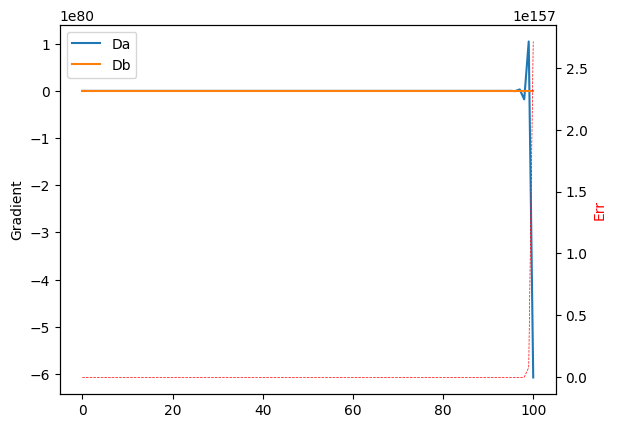

In [62]:
reg = LinearRegression(a=1,b=0)
reg.fit(x,y,lr=5e-4)
reg.plot_gradients()
plt.show()
reg.plot_video()


Pour limiter cette divergence à l'augmentation du learning rate, on va utiliser le momentum $\beta$ :<br>
$a_{n+1} = a_n - \nu.(\beta.\nabla_{a_{n-1}}E_{totale} + (1-\beta).\nabla_{a_{n}}E_{totale})$<br>
$b_{n+1} = b_n - \nu.(\beta.\nabla_{b_{n-1}}E_{totale} + (1-\beta).\nabla_{b_{n}}E_{totale})$<br>


In [12]:
from matplotlib.animation import FuncAnimation
from IPython import display
import time
n_iter = 100
plot_every = 10

class LinearRegression:
    DErr_da_fn = lambda x,y,a,b:np.sum(-x*(y-(a*x+b)))
    DErr_db_fn = lambda x,y,a,b:np.sum(-(y-(a*x+b)))
    Err_fn = lambda x,y,a,b:np.sum((y-(a*x+b))**2)
    def __init__(self,a,b):
        self.a = a
        self.b = b
        self.x = None
        self.y = None
        self.Da = None
        self.Db = None
        self.lr = None
        self.beta = None
        self.video = None

    def fit(self,x,y,lr=1e-4,beta=0.9,iterations=100):
        self.x = x
        self.y = y
        self.beta = beta
        self.lr = lr
        self.d_a = 0
        self.d_b = 0
        self.Da = []
        self.Db = []
        self.Err = []
        # We create the figure and fit the model...
        fig,ax = self.plot_points()
        anim = FuncAnimation(fig,self._update,frames=iterations,interval=200)
        self.video = anim.to_html5_video()
        self.fig_final = fig
        plt.close()

    def plot_video(self):
        assert self.video is not None,'Run fit before'
        html = display.HTML(self.video)
        display.display(html)
    
    def plot_gradients(self):
        assert self.Da is not None and self.Db is not None,'Run fit before'
        fig,ax = plt.subplots()
        ax2 = ax.twinx()
        ax.plot(self.Da,label='Da')
        ax.plot(self.Db,label='Db')
        ax.set_ylabel('Gradient')
        ax2.plot(self.Err,label='Err',color='r',linewidth=0.5,linestyle='dashed')
        ax2.set_ylabel('Err', color='r')
        ax.legend()

    def plot_points(self):
        fig,ax =plt.subplots(1,1)
        ax.scatter(self.x,self.y)
        self.line,=ax.plot(self.x,self.a*self.x+self.b,color='r')
        # We plot a line, showing the error...
        self.err,=ax.plot([self.x[10],self.x[10]],[self.a*self.x[10]+self.b,self.y[10]],color='r',linestyle='dashed')
        self.txt =ax.text(-20,0,f'y = {round(self.a,2)}.x+{round(self.b,2)}',color='r')
        return fig,ax
    
    def _update(self,frame):
        d_a = LinearRegression.DErr_da_fn(self.x,self.y,self.a,self.b)
        d_b = LinearRegression.DErr_db_fn(self.x,self.y,self.a,self.b)
        Err = LinearRegression.Err_fn(self.x,self.y,self.a,self.b)
        if len(self.Da)>0:
            d_a = (self.beta*self.Da[-1]+(1-self.beta)*d_a)
        if len(self.Db)>0:
            d_b = (self.beta*self.Db[-1]+(1-self.beta)*d_b)
        self.Da.append(d_a)
        self.Db.append(d_b)
        self.Err.append(Err)
        self.a = self.a-self.lr*d_a
        self.b = self.b-self.lr*d_b
        self.line.set_data(self.x,self.a*self.x+self.b)
        self.err.set_data([self.x[10],self.x[10]],[self.a*self.x[10]+self.b,self.y[10]])
        self.txt.set_text(f'y = {round(self.a,2)}.x+{round(self.b,2)}')


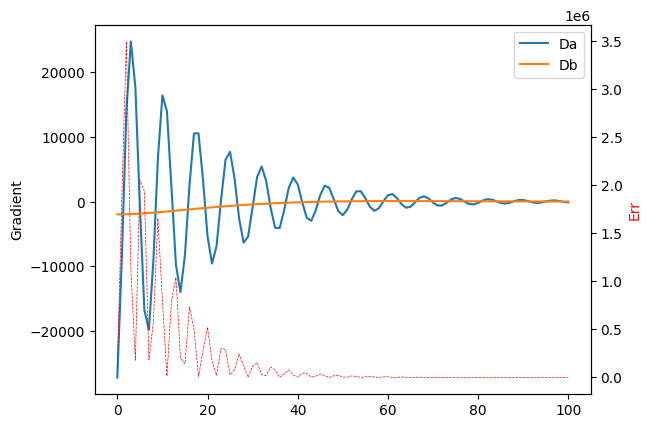

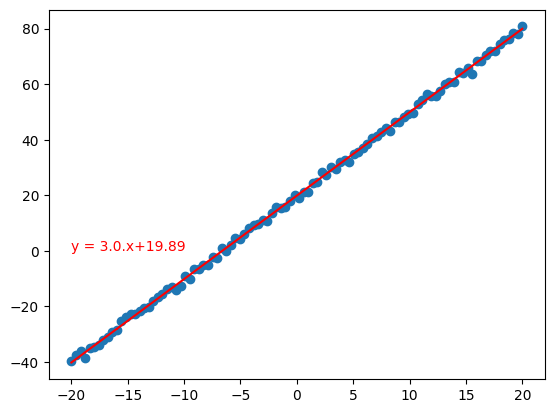

In [13]:
reg = LinearRegression(a=1,b=0)
reg.fit(x,y,lr=5e-4,beta=0.9)
reg.plot_gradients()
reg.plot_points()
reg.plot_video()
plt.show()

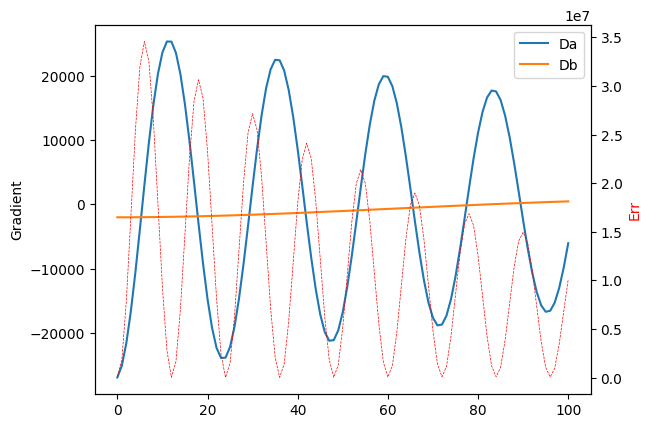

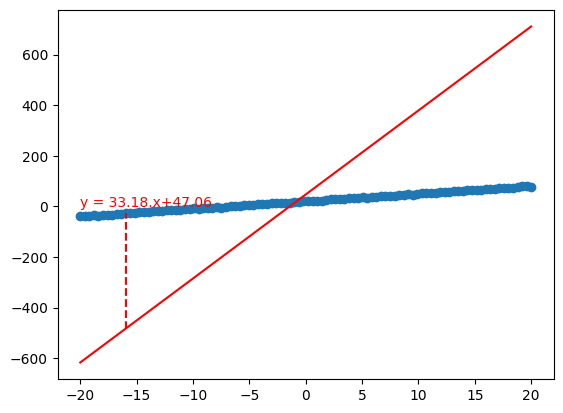

In [52]:
reg = LinearRegression(a=1,b=0)
reg.fit(x,y,lr=5e-4,beta=0.99)
reg.plot_gradients()
reg.plot_points()
reg.plot_video()
plt.show()

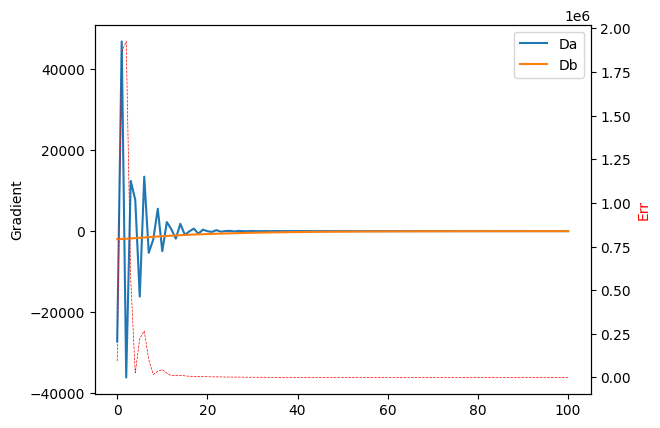

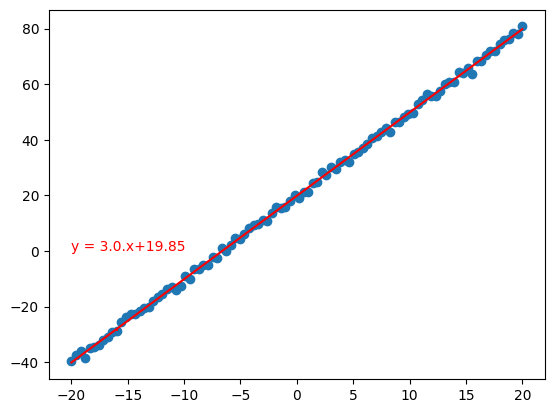

In [16]:
reg = LinearRegression(a=1,b=0)
reg.fit(x,y,lr=5e-4,beta=0.6)
reg.plot_gradients()
reg.plot_points()
reg.plot_video()
plt.show()

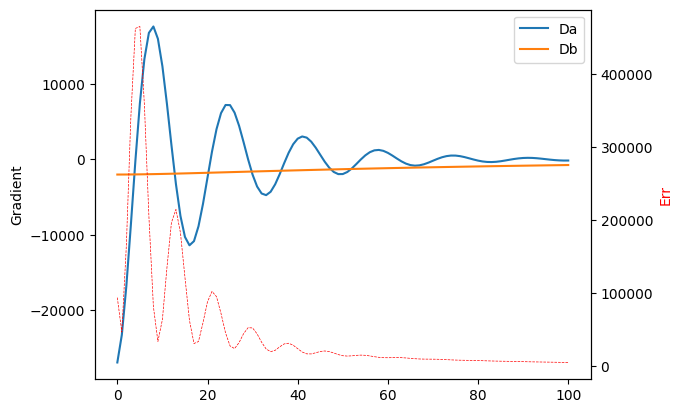

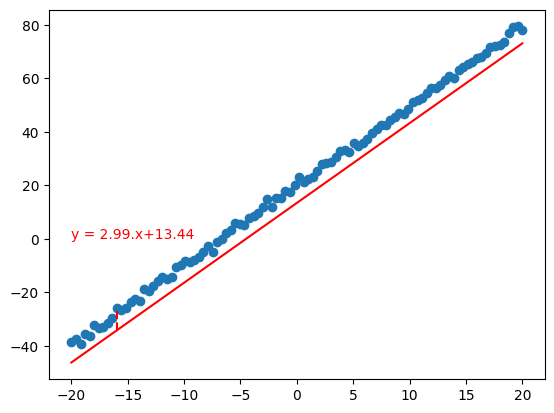

In [57]:
reg = LinearRegression(a=1,b=0)
reg.fit(x,y,lr=1e-4,beta=0.9)
reg.plot_gradients()
reg.plot_points()
plt.show()